# Notebook #2: Clustering DBScan

In [338]:
%load_ext autoreload
%autoreload 2

# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)


# Feature scaling
# -----------------------------------------------------------------------
from sklearn.preprocessing import RobustScaler, MinMaxScaler, Normalizer, StandardScaler


# Configuración warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Librería para el acceso a variables y funciones
# -----------------------------------------------------------------------
import sys
sys.path.append("../../")

from src import soporte_preprocesamiento as sp
from src import soporte_encoding as se
from src import soporte_scaling as ss
from src import soporte_clustering as sc

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Análisis Exploratorio de los Datos (EDA)

- Como primera tarea en este proyecto, sabemos que, la empresa busca comprender mejor su base de clientes, productos y operaciones para tomar decisiones informadas que maximicen el beneficio y optimicen sus procesos.

- El primer paso será entender a los clientes, a través de modelos que nos permitan agruparlos según características similares.

- Vamos a importar los datos de origen.

In [339]:
df = pd.read_csv("../../datos/origen/Global_Superstore.csv", encoding = "latin")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,10024.0,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,NaN,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,NaN,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,NaN,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


- Y utilizamos una función de exploración para entender mejor nuestro conjunto de datos.

In [340]:
exploracion = sp.exploracion_datos(df)

El número de filas es 51290 y el número de columnas es 24

----------

En este conjunto de datos tenemos 0 valores duplicados

----------

Los columnas con valores nulos y sus porcentajes son: 


Postal Code    80.51472
dtype: float64


----------

Las principales estadísticas de las variables númericas son:


,count,mean,std,min,25%,50%,75%,max
Row ID,51290.0,25645.500000,14806.291990,1.000,12823.250000,25645.500,38467.7500,51290.000
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.000000,56430.500,90008.0000,99301.000
Sales,51290.0,246.490581,487.565361,0.444,30.758625,85.053,251.0532,22638.480
Quantity,51290.0,3.476545,2.278766,1.000,2.000000,3.000,5.0000,14.000
Discount,51290.0,0.142908,0.212280,0.000,0.000000,0.000,0.2000,0.850
Profit,51290.0,28.610982,174.340972,-6599.978,0.000000,9.240,36.8100,8399.976
Shipping Cost,51290.0,26.375915,57.296804,0.000,2.610000,7.790,24.4500,933.570



----------

Las principales estadísticas de las variables categóricas son:


,count,unique,top,freq
Order ID,51290,25035,CA-2014-100111,14
Order Date,51290,1430,18-06-2014,135
Ship Date,51290,1464,22-11-2014,130
Ship Mode,51290,4,Standard Class,30775
Customer ID,51290,1590,PO-18850,97
Customer Name,51290,795,Muhammed Yedwab,108
Segment,51290,3,Consumer,26518
City,51290,3636,New York City,915
State,51290,1094,California,2001
Country,51290,147,United States,9994



----------

Las características principales del dataframe son:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category

None

- Vemos que, tenemos aproximadamente 50 mil registros y 24 columnas. No tenemos datos nulos ni duplicados.

- El DF contiene registros de clientes y sus pedidos, incluyendo la categoría, ingreso y beneficio, datos del envío y región.

- Vamos a analizar la información de las columnas para determinar cuáles son, a priori, más interesantes para nuestro clustering de clientes.

In [341]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

- Nos quedaremos con: 

| Columna         | Descripción                                           |
|-----------------|-------------------------------------------------------|
| segment         | Segmento del cliente (ejemplo: consumidor, corporativo). |
| market         | País donde se realiza la venta.         |
| category        | Categoría del producto o servicio (tecnología, muebles o suministros). |
| profit          | Ganancia obtenida por la transacción.                 |
| orderpriority   | Prioridad del pedido (crítica, media...).    |

In [342]:
df["Category"].unique()

array(['Technology', 'Furniture', 'Office Supplies'], dtype=object)

- Nos quedaremos con el "Profit" y no las ventas porque nos interesa priorizar por el beneficio que generan las categorías, no las ventas como tales.

In [343]:
pd.DataFrame(df.groupby(by="Category")["Profit"].sum()).sort_values(by="Profit", ascending=False)

,Profit
Category,
Technology,663778.73318
Office Supplies,518473.83430
Furniture,285204.72380


In [344]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

- Y aplicamos el filtro.

In [345]:
df= df[["Segment", "Market", "Category", "Profit", "Order Priority"]]

In [346]:
df.dtypes

Segment            object
Market             object
Category           object
Profit            float64
Order Priority     object
dtype: object

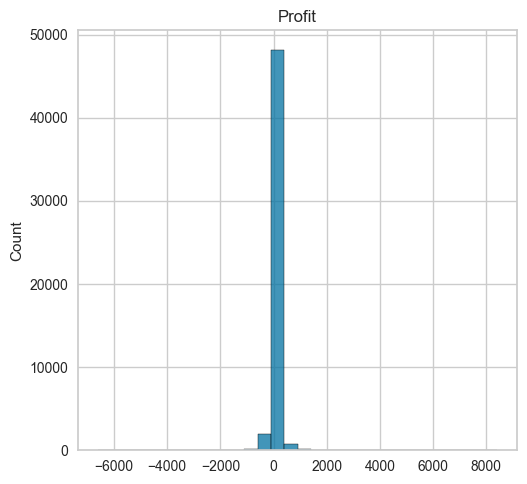

In [347]:
sp.plot_numericas(df, figsize=(10,5), bins=30)

- Tenemos una única columna numérica, en la que, tratándose de datos de beneficio, sigue la distribución esperada.

- Visualicemos ahora las features categóricas:

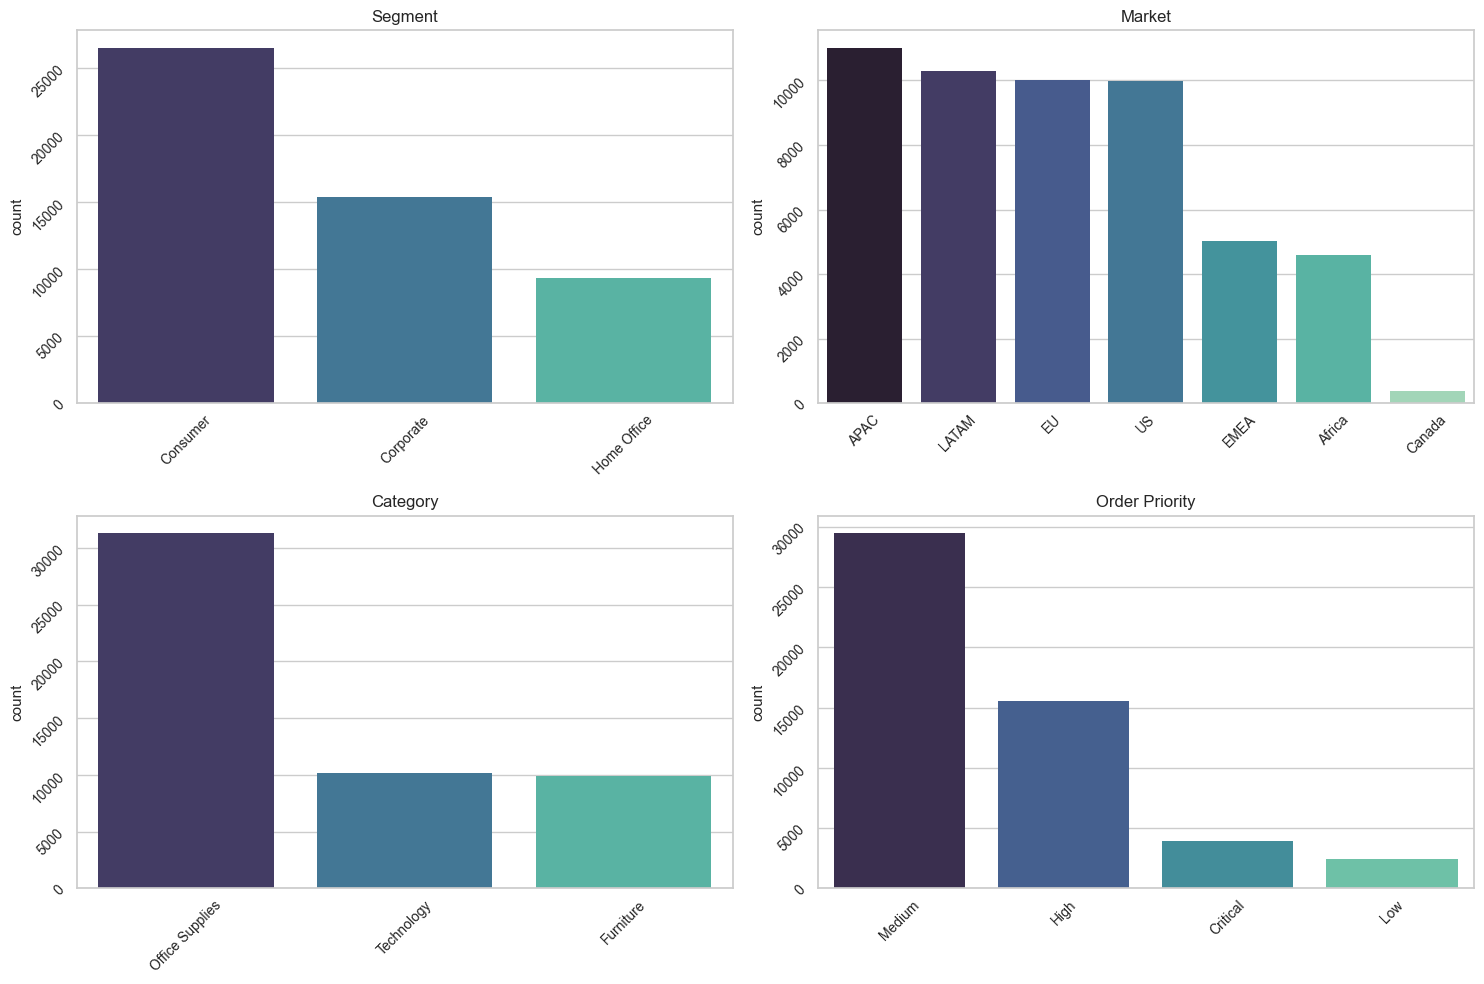

In [348]:
sp.plot_cat(df)

- Podemos ver que, tenemos categorías repartidas para todas las features, aunque predominan las ventas de suministros de oficina en la categoría de consumer, con una prioridad de orden principalmente mediana.

- En lo que respecta a los mercados, APAC, LATAM, EU y US se reparten la mayoría de ventas, con EMEA y África siendo también importantes, con ventas marginales en Canadá.

- Visualicemos ahora los outliers en columnas numéricas.

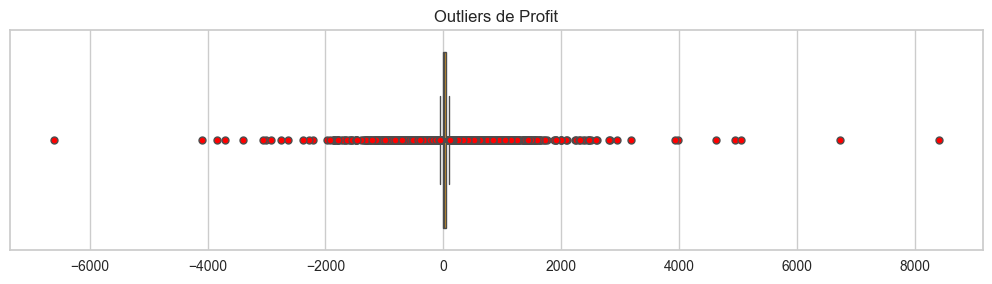

In [349]:
sp.detectar_outliers(df, tamano_grafica=(20,3))

- En el caso de Profits, vemos que tenemos un gran número de outliers, lo cual tiene sentido dado que tenemos ventas de categorías muy variadas, desde papel hasta fotocopiadoras.

- Vamos a verlos numéricamente utilizando el método IFO.

In [350]:
sp.outliers_isolation_forest(df)

,Segment,Market,Category,Profit,Order Priority,outliers_ifo_0.01_50,outliers_ifo_0.01_100,outliers_ifo_0.01_200,outliers_ifo_0.05_50,outliers_ifo_0.05_100,outliers_ifo_0.05_200,outliers_ifo_0.1_50,outliers_ifo_0.1_100,outliers_ifo_0.1_200
0,Consumer,US,Technology,762.1845,Critical,-1,-1,1,-1,-1,-1,-1,-1,-1
1,Corporate,APAC,Furniture,-288.7650,Critical,1,1,1,-1,-1,-1,-1,-1,-1
2,Consumer,APAC,Technology,919.9710,Medium,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,Home Office,EU,Technology,-96.5400,Medium,1,1,1,1,1,1,1,-1,1
4,Consumer,Africa,Technology,311.5200,Critical,1,1,1,-1,1,1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,Corporate,APAC,Office Supplies,4.5000,Medium,1,1,1,1,1,1,1,1,1
51286,Consumer,US,Office Supplies,-1.1100,Medium,1,1,1,1,1,1,1,1,1
51287,Home Office,US,Office Supplies,11.2308,High,1,1,1,1,1,1,1,1,1
51288,Home Office,LATAM,Office Supplies,2.4000,Medium,1,1,1,1,1,1,1,1,1


- Filtramos aquellos para los cuáles en el 70% de las combinacines, son outliers. Sabemos que el DBScan agrupa a los outliers, sin embargo, tras varias interaciones de prueba, vamos a eliminarlos del conjunto de datos.

In [351]:
df, df_filtrado = sp.filtrar_outliers(df, 0.7, drop_indices=True)
df.reset_index(inplace= True, drop= True)

Se han filtrado 566 filas, que representan un 1.1% del dataframe original.


,Segment,Market,Category,Profit,Order Priority,outliers_ifo_0.01_50,outliers_ifo_0.01_100,outliers_ifo_0.01_200,outliers_ifo_0.05_50,outliers_ifo_0.05_100,outliers_ifo_0.05_200,outliers_ifo_0.1_50,outliers_ifo_0.1_100,outliers_ifo_0.1_200
0,Consumer,US,Technology,762.1845,Critical,-1,-1,1,-1,-1,-1,-1,-1,-1
2,Consumer,APAC,Technology,919.9710,Medium,-1,-1,-1,-1,-1,-1,-1,-1,-1
5,Corporate,APAC,Technology,763.2750,Critical,-1,-1,1,-1,-1,-1,-1,-1,-1
7,Consumer,APAC,Furniture,996.4800,High,-1,-1,-1,-1,-1,-1,-1,-1,-1
8,Corporate,US,Office Supplies,1906.4850,Low,-1,-1,-1,-1,-1,-1,-1,-1,-1


Se han eliminado 566 filas (1.0%) del dataframe original.


## Encoding

- Dado que, nos interesa asignar peso a nuestras variables de acuerdo con el beneficio (profit) con el que se relacionan, usaremos el Target Encoding para todas las columnas categóricas.

- Como primer paso definimos un diccionario de encoding, llamamos a la clase y almacenamos tanto el nuevo dataframe como el objeto de encoding.

In [352]:
diccionario_encoding = {
    "onehot": [],
    "dummies": [],
    "ordinal": {},
    "label": [],
    "frequency": [],
    "target": ["Segment", "Market", "Category", "Order Priority"],
    "catboost": []
}

In [353]:
encoding = se.Encoding(df, diccionario_encoding, "Profit")

In [354]:
ta_enc, encoder = encoding.target_encoding()
ta_enc.head()

,Profit,Segment,Market,Category,Order Priority
0,-288.765,25.196265,33.792045,31.485538,29.509393
1,-96.540,28.018171,33.734339,54.055162,25.577825
2,311.520,25.637476,18.810159,54.055162,29.509393
3,564.840,25.637476,33.792045,31.485538,29.509393
4,83.281,25.196265,23.548293,15.273464,26.183479


## Estandarización

- Para mantener la escala de nuestros datos, estandarizaremos tanto la columna numérica ("profit") como el resto de categóricas (a pesar de estar encoded), de modo que, nuestro modelo asigne "pesos" equitativos.

- Usaremos el MinMax Scaler, almacenando el df resultante y el objeto del escalador.

In [355]:
df_standard, scaler = ss.aplicar_escaladores(ta_enc, ['Profit', "Segment", "Market", "Category", "Profit", "Order Priority"], [MinMaxScaler()], return_scaler=True)
df_standard.drop(columns=['Profit', "Segment", "Market", "Category", "Profit", "Order Priority"], inplace= True)
df_standard.head(2)

,Profit_minmax,Segment_minmax,Market_minmax,Category_minmax,Order Priority_minmax
0,0.210077,0.0,0.815090,0.418034,1.000000
1,0.359314,1.0,0.812983,1.000000,0.400516


# Clustering

- Para crear nuestros clusters, usaremos en esta segunda iteración el modelo DBScan. Primero, llamamos a la clase.

In [356]:
clustering = sc.Clustering(df_standard)

- Para buscar nuestro valor de *epsilon*, vamos a crear un plot de distancias, siendo la cantidad de vecinos 2000.

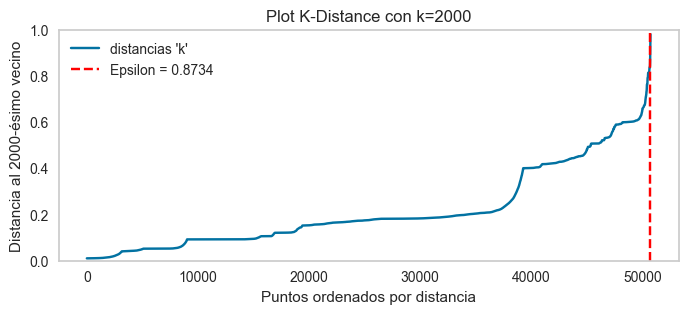

In [357]:
epsilon = clustering.plot_epsilon(df_standard, 2000, (8,3), (0,1))

- Probaremos ahora distintas combinaciones por abajo y por arriba de *epsilon*, así como distintos números de vecinos, en busca de las mejores métricas.

In [358]:
df_dbscan = clustering.modelo_dbscan(df_standard, eps_values=[0.5, 1, 1.5], min_samples_values=[50, 500, 1000, 2000])

Iterando sobre eps y min_samples: 100%|██████████| 3/3 [14:47<00:00, 295.88s/it]


,eps,min_samples,silhouette_score,davies_bouldin_score,cardinality
2,0.5,1000,0.431025,1.258282,"{-1: 1295, 0: 1634, 1: 30756, 2: 2602, 3: 7520..."
3,0.5,2000,0.414438,1.191818,"{-1: 3237, 0: 30756, 1: 7520, 2: 6917, 3: 2294}"
1,0.5,500,0.412544,1.051914,"{-1: 671, 0: 2602, 1: 1643, 2: 30756, 3: 7520,..."
0,0.5,50,0.404271,1.010652,"{0: 2602, 1: 1643, 2: 618, 3: 30756, 4: 544, 5..."


Mejor modelo: eps=0.5, min_samples=1000, silhouette_score=0.4310
Se han generado 6 clusters (incluyendo outliers, si los hay).


- Vemos que, aún en el mejor modelo, tenemos 6 clusters, con un silhouette bajo (distancia alta intra-cluster y baja entre clusters) y un DBI que nos indica que los clusters no se han separado adecuadamente (>1).

- Vamos a probar directamente los valores obtenidos del plot de la distancia "k", con *epsilon*=0.87 y min_samples = 2000.

In [372]:
df_dbscan2, metricas = clustering.modelo_dbscan(df_standard, eps_values=[0.87], min_samples_values=[2000])

Iterando sobre eps y min_samples: 100%|██████████| 1/1 [00:38<00:00, 38.31s/it]


,eps,min_samples,silhouette_score,davies_bouldin_score,cardinality
0,0.87,2000,0.678424,0.54414,"{-1: 3237, 0: 30756, 1: 2294, 2: 7520, 3: 6917}"


Mejor modelo: eps=0.87, min_samples=2000, silhouette_score=0.6784
Se han generado 5 clusters (incluyendo outliers, si los hay).


- Vemos que, tenemos mejores resultados, tanto en el silhouette como en el DBI, vamos a graficar los clusters para identificar si tienen sentido.

In [373]:
df_dbscan2[['clusters_dbscan']] = df_dbscan2[['clusters_dbscan']].astype(int)
try:
    df.drop(columns = "clusters_dbscan", inplace=True)
except:
    pass
df_dbscan2.columns = list(df.columns)+["clusters_dbscan"]
df["clusters_dbscan"] = df_dbscan2["clusters_dbscan"]

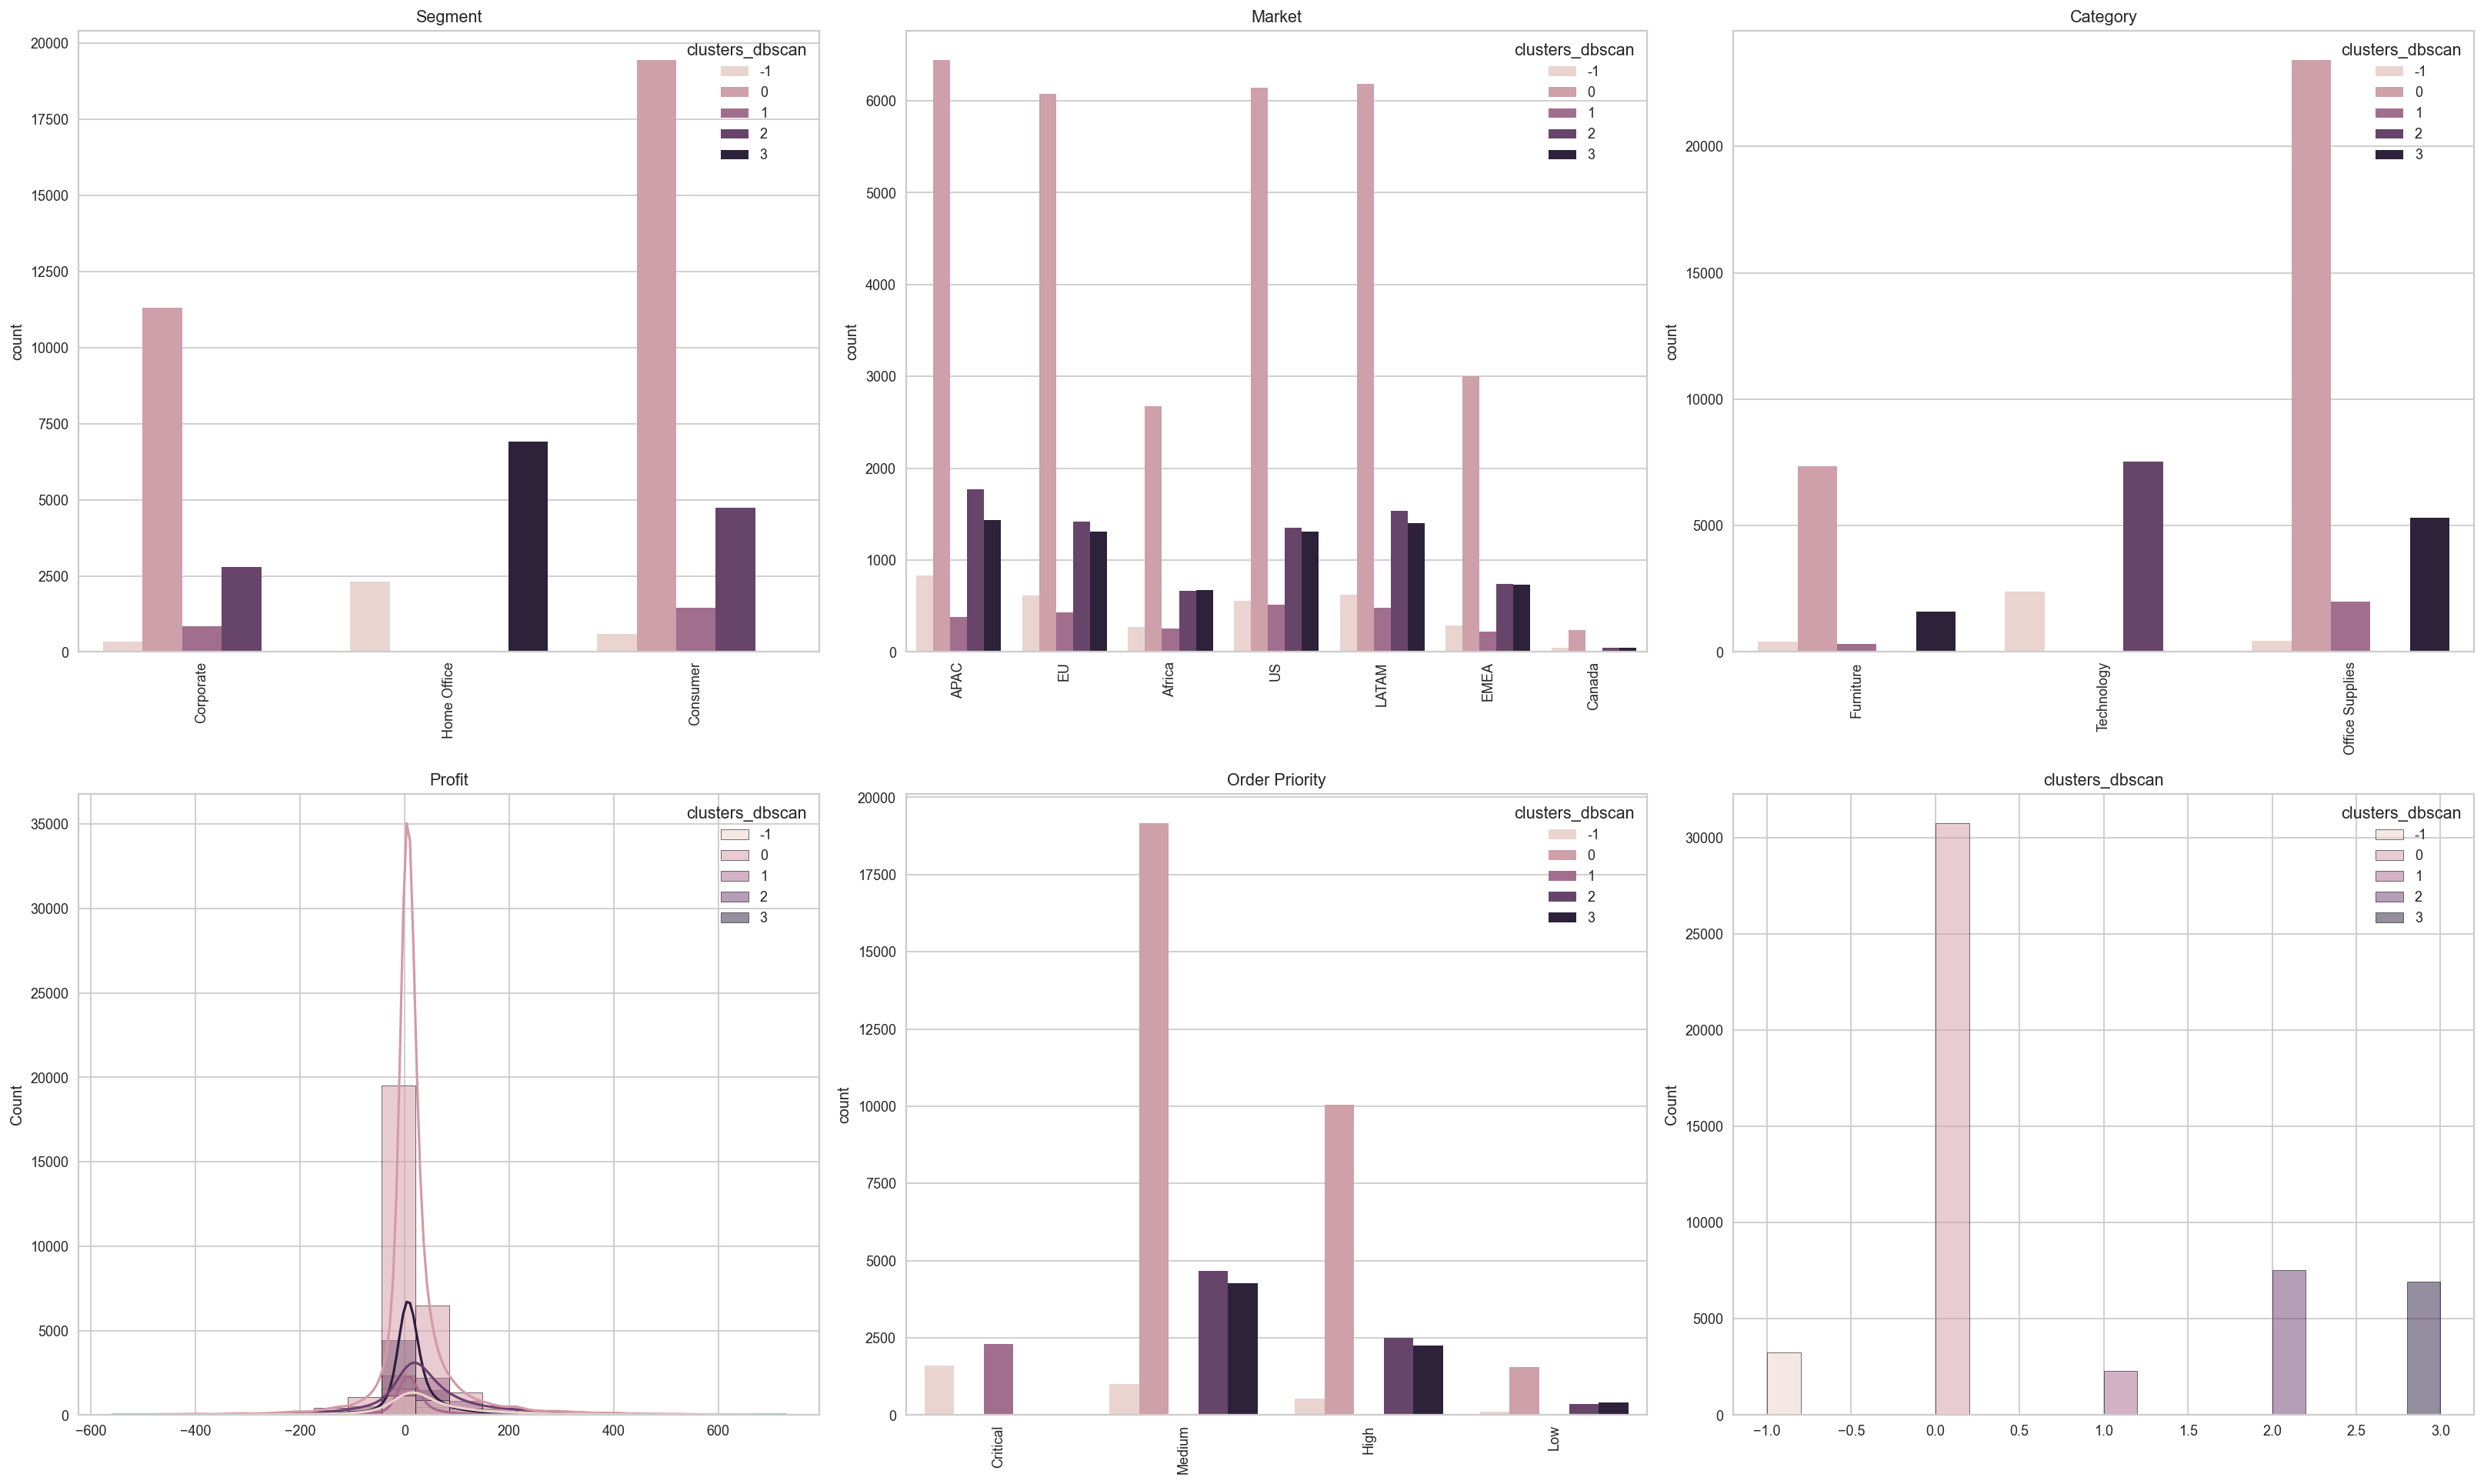

In [374]:
clustering.plot_completo_clusters(data=df, x=df.columns, hue='clusters_dbscan')

- Vemos que, tenemos 4 clusters, más los *outliers* que identifica este modelo. Tenemos un cluster principal, que es el cero.

- El segmento Home Office tiene su propio cluster, el número 3, y la categoría Furniture la compra casi en exclusivo el cluster 0. Aparte de eso, tras muchas iteraciones, concluimos que el DBScan no ha sido capaz de identificar patrones más claros en nuestro dataset, con lo cual, no será el que utilicemos.

- Nos quedaremos entonces con el k-means.